In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:

df['age'].fillna(df['age'].mean(), inplace=True)
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\anjal\AppData\Local\Temp\ipykernel_11528\3585923041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [49]:
# Exploratory Data Analysis (EDA)

print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


<Axes: xlabel='pclass', ylabel='count'>

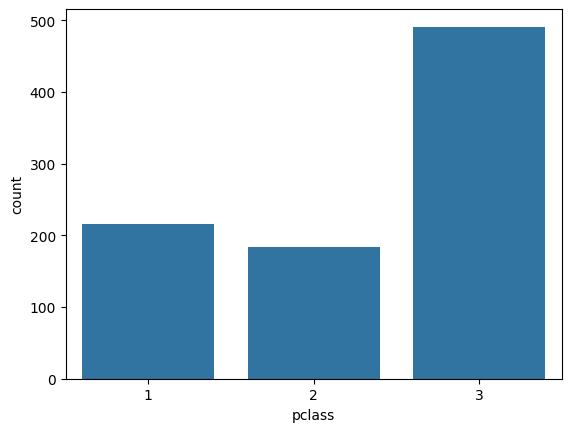

In [51]:
sns.countplot(x='pclass', data=df)


<Axes: xlabel='survived', ylabel='count'>

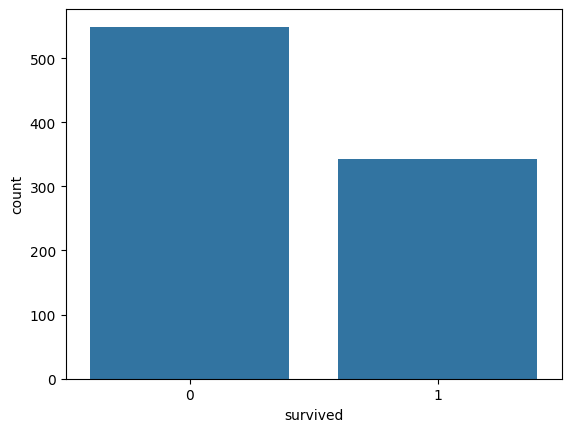

In [52]:
sns.countplot(x='survived', data=df)


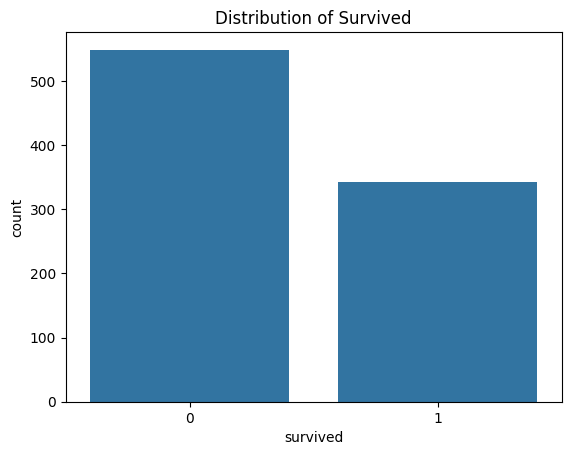

In [53]:
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survived')
plt.show()


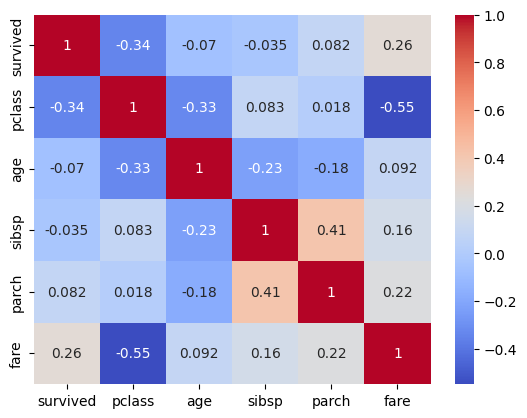

In [54]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm")
plt.show()

In [55]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

# Verify encoding
print(df[['sex']].head())

   sex
0    1
1    0
2    0
3    0
4    1


In [56]:
#Standardization

from sklearn.preprocessing import StandardScaler
df_numeric = df.select_dtypes(include=['float64', 'int64']).drop('survived', axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

print(df_scaled.head())

     pclass       sex       age     sibsp     parch      fare
0  0.827377  0.737695 -0.592481  0.432793 -0.473674 -0.502445
1 -1.566107 -1.355574  0.638789  0.432793 -0.473674  0.786845
2  0.827377 -1.355574 -0.284663 -0.474545 -0.473674 -0.488854
3 -1.566107 -1.355574  0.407926  0.432793 -0.473674  0.420730
4  0.827377  0.737695  0.407926 -0.474545 -0.473674 -0.486337


In [57]:

# 2. Model Implementation
from sklearn.model_selection import train_test_split

X = df.select_dtypes(include=['float64', 'int64']).drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())


     pclass  sex   age  sibsp  parch     fare
331       1    1  45.5      0      0  28.5000
733       2    1  23.0      0      0  13.0000
382       3    1  32.0      0      0   7.9250
704       3    1  26.0      1      0   7.8542
813       3    0   6.0      4      2  31.2750


In [58]:
#Train the Models
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [59]:
y_pred = lr.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8100558659217877


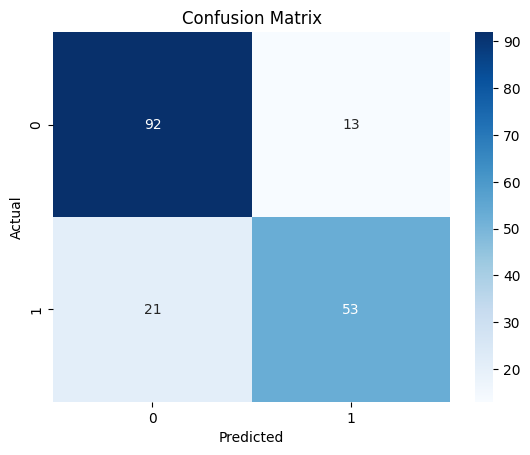

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [62]:
import numpy as np

def manual_input_prediction(model):
    print("\nEnter passenger details:")
    pclass = int(input("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): "))
    sex = input("Sex (male/female): ").lower()
    age = float(input("Age: "))
    sibsp = int(input("Number of Siblings/Spouses aboard: "))
    parch = int(input("Number of Parents/Children aboard: "))
    fare = float(input("Fare: "))
    embarked = input("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton): ").upper()

    
    sex_val = 1 if sex == 'male' else 0
    embarked_val = {'C': 0, 'Q': 1, 'S': 2}.get(embarked, 2)  # default to 'S'

    input_features = np.array([[pclass, sex_val, age, sibsp, parch, fare]])

    # Predict
    prediction = model.predict(input_features)
    prediction_proba = model.predict_proba(input_features)

    print("\nPrediction: Survived" if prediction[0] == 1 else "Prediction: Did not survive")
    print(f"Probability of survival: {prediction_proba[0][1]*100:.2f}%")

# Example usage
manual_input_prediction(lr)



Enter passenger details:


Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd):  1
Sex (male/female):  0
Age:  22
Number of Siblings/Spouses aboard:  1
Number of Parents/Children aboard:  1
Fare:  6.81
Embarked (C = Cherbourg, Q = Queenstown, S = Southampton):  S



Prediction: Survived
Probability of survival: 90.13%


C:\Users\anjal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\anjal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
